### RandomForestRegressor
-with this model,how i improved my result:

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Datetime function
-converts a column to timestamps.

In [38]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = pd.to_datetime(df['datetime']).dt.hour #I separate the hour from datetime column:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [39]:
df['month'] = df['datetime'].dt.month
df['week'] = df['datetime'].dt.week #again i made 2 new columns from datetime columns and use pd.to_datetime function:

<ipython-input-39-e8b118e5a430>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['datetime'].dt.week #again i made 2 new columns from datetime columns and use pd.to_datetime function:


In [40]:
X = df[['temp', 'atemp', 'hour', 'weather', 'humidity', 'month', 'week', 'windspeed']] #took 8 list of features for Training the data:
X.head()

,temp,atemp,hour,weather,humidity,month,week,windspeed
0,9.84,14.395,0,1,81,1,52,0.0
1,9.02,13.635,1,1,80,1,52,0.0
2,9.02,13.635,2,1,80,1,52,0.0
3,9.84,14.395,3,1,75,1,52,0.0
4,9.84,14.395,4,1,75,1,52,0.0


In [41]:
y = df['count'] #my leable data(goal ,the value in the count we need to predict)

In [42]:
#df1= pd.isna('atemp')
#df1

In [43]:
#df['temp']=df['temp'].fillna(df['temp'].mean())
#X = df[['temp', 'atemp']]
#X.head(3)

### Train_test_split
-from sklearn I split X and y

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
X_test.shape, y_test.shape

((2178, 8), (2178,))

### DecisionTreeClassifier:
-model
-DecisionTreeClassifier is good for Classifier and DecisionTreeRegressor is good for Regressor

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
m = DecisionTreeClassifier(max_depth=2)
m.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [47]:
#X_train.head()

In [48]:
ypred = m.predict(X_train)

In [49]:
m.score(X_train, y_train) #training accuracy:

0.021129995406522738

### LinearRegression model: 
- LinearRegression is good for Regrassor but not for classifire:;;
-we are trying to predict a scalar value.
-Linear Regression is a straightforward model. It basically fits a straight line to the data points.
-ŷ =w0+w1∗x
-Here, w0 is the intercept (also called bias) and w1 is the slope (also called weight or coefficient) of the line.

In [50]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()  # <-- hyperparameter that makes the LogReg smoother
m.fit(X, y)  # train the model == finds optimal parameters

acc = m.score(X, y)  # calculates an accuracy
print(f"{acc.round(3)} accuracy")

0.338 accuracy


In [51]:
from sklearn.ensemble import RandomForestRegressor

### RandomForestRegressor model:
-Algorithom for Regression.
-Regression:it is a task to predict a continuous value.
-(A random forest is a meta estimator that fits a number of classifical decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting).

### Bulding the Model With default values

In [52]:
RF_model = RandomForestRegressor(n_estimators = 1000) #n_estimators is a default value 
RF_model.fit(X_train, y_train);

In [53]:
acc = RF_model.score(X_train, y_train)  # calculates training accuracy
print(f"{acc.round(3)} accuracy")

0.962 accuracy


### To Find importance  of features:

In [71]:
RF_model.feature_importances_

array([0.11735787, 0.06374882, 0.53538014, 0.02608317, 0.0951451 ,
       0.04086036, 0.0635155 , 0.05790904])

In [54]:
y_predict = RF_model.predict(X_train) # Make predictions for the training data

In [55]:
y_predict

array([292.586, 741.075,  83.96 , ..., 587.854, 175.551, 434.808])

In [56]:
acc = RF_model.score(X_test, y_test)  # calculates test accuracy
print("accuracy:: ", f"{acc.round(3)}")

accuracy::  0.703


In [57]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = RF_model, X = X_train, y = y_train, cv =10)
mean_acc = accuracy.mean()
print('Mean accuracy: ',mean_acc)

Mean accuracy:  0.7194874018921952


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='weather', ylabel='count'>

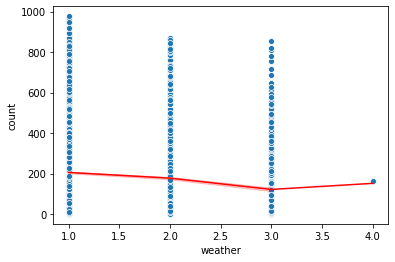

In [66]:
# Plot the training data and the predictions for the training data
sns.scatterplot(x=X_train['weather'], y=y_train)
sns.lineplot(x=X_train['weather'], y=y_predict, color='r')

<AxesSubplot:xlabel='month', ylabel='count'>

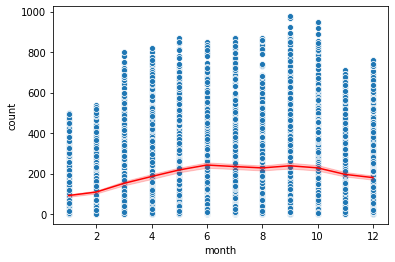

In [65]:
sns.scatterplot(x=X_train['month'], y=y_train)
sns.lineplot(x=X_train['month'], y=y_predict, color='r')

<AxesSubplot:xlabel='temp', ylabel='count'>

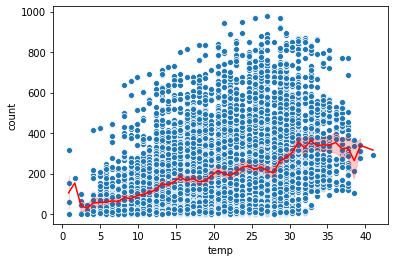

In [64]:
sns.scatterplot(x=X_train['temp'], y=y_train)
sns.lineplot(x=X_train['temp'], y=y_predict, color='r')

<AxesSubplot:xlabel='temp', ylabel='count'>

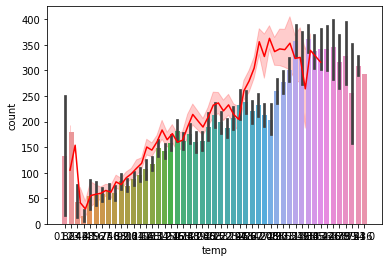

In [70]:
figsize = (12, 8)
sns.barplot(x=X_train['temp'], y=y_train, hue=None)
sns.lineplot(x=X_train['temp'], y=y_predict, color='r')

<AxesSubplot:>

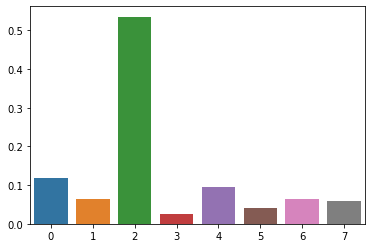

In [73]:
sns.barplot(x=list(range(8)), y=RF_model.feature_importances_) #we can compare within the features(from feature Selection):

<AxesSubplot:>

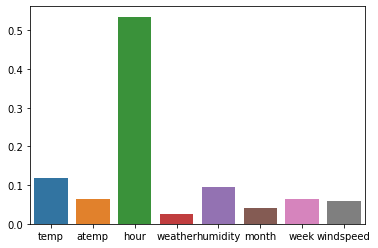

In [75]:
sns.barplot(x=X.columns, y=RF_model.feature_importances_) #we can easily know that which column is more important then others: